In [1]:
import scanpy as sc
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
import os

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Sup8A

In [2]:
import scanpy as sc

# 读取数据
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

# 确保观测名是字符串类型
adata.obs_names = adata.obs_names.astype(str)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: 

In [3]:
tmp = adata.obs[adata.obs['anno'].isin(['b_cell', 'plasma_cell'])]

In [4]:
tmp['bin50 structural annotation'] = tmp['bin50 structural annotation'].astype(str)
tmp.loc[~tmp['bin50 structural annotation'].isin(['LA-PCA', 'LA-TLS']), 'bin50 structural annotation'] = 'other'

/tmp/ipykernel_2864556/31400852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['bin50 structural annotation'] = tmp['bin50 structural annotation'].astype(str)


In [6]:
batch_order = [
    'D06053D2', 'D06047C3', 'D06047F6', 'D06047E1',
    'D06050A2', 'D06047A2', 'D06050C2', 'D06047D4',
    'D06047E2', 'D06050D4', 'D06050E4'
]

df_grouped = (
    tmp
    .groupby(['batch', 'bin50 structural annotation'])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
    .reindex(batch_order)  # 按指定顺序排列
)

In [8]:
df_grouped['other'] = (df_grouped['other'] * 100).round(2).astype(str) + '%'
df_grouped['LA-PCA'] = (df_grouped['LA-PCA'] * 100).round(2).astype(str) + '%'
df_grouped['LA-TLS'] = (df_grouped['LA-TLS'] * 100).round(2).astype(str) + '%'

In [9]:
df_grouped 

bin50 structural annotation,LA-PCA,LA-TLS,other
batch,,,
D06053D2,69.95%,6.85%,23.2%
D06047C3,43.81%,12.6%,43.59%
D06047F6,58.35%,5.51%,36.14%
D06047E1,57.13%,24.28%,18.59%
D06050A2,36.42%,11.37%,52.21%
D06047A2,69.36%,13.71%,16.93%
D06050C2,64.32%,4.68%,31.0%
D06047D4,54.68%,20.4%,24.91%
D06047E2,61.31%,0.31%,38.38%


In [10]:
df_grouped.to_csv('Sup8A.csv')

# Sup8B

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
#import scvelo as scv
import anndata as ad
import omicverse as ov
import pcurvepy2

/home/fengyu/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_data.py:329: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Begin robust gene identification
After filtration, 30647/30654 genes are kept.     Among 30647 genes, 29896 genes are robust.
End of robust gene identification.
Begin size normalization: pearson and HVGs selection pearson
Time to analyze data in cpu: 10.276660442352295 seconds.
End of size normalization: pearson and HVGs selection pearson


2025-08-18 14:34:07,729 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-08-18 14:34:09,378 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-08-18 14:34:09,447 - harmonypy - INFO - Iteration 1 of 10
2025-08-18 14:34:11,813 - harmonypy - INFO - Iteration 2 of 10
2025-08-18 14:34:14,146 - harmonypy - INFO - Converged after 2 iterations


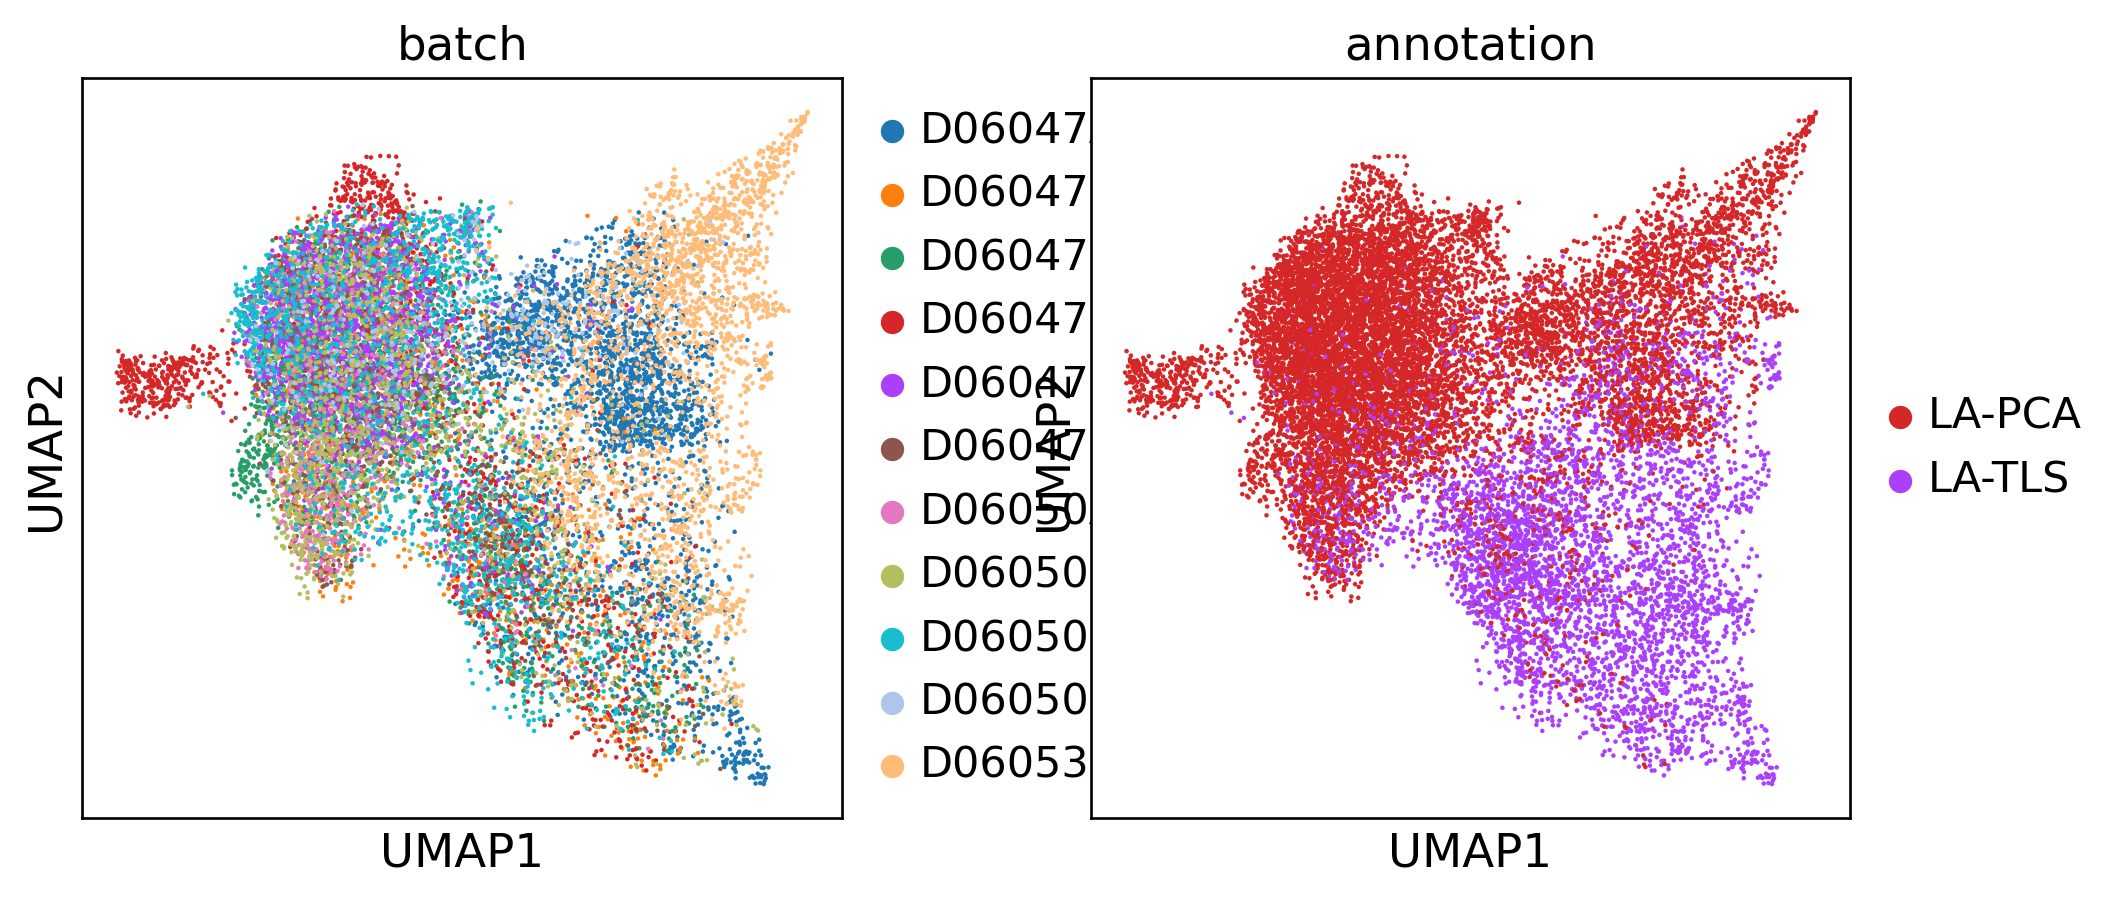

In [3]:
LA_bin50=sc.read_h5ad('/data1/fengyu/methods/trajectory/LA_for_trajectory.h5ad')
LA_bin50=ov.pp.preprocess(LA_bin50,mode='pearson|pearson',n_HVGs=3000,)
#LA_bin50=ov.pp.preprocess(LA_bin50,mode='shiftlog|pearson',n_HVGs=3000,)
LA_bin50.raw = LA_bin50
LA_bin50 = LA_bin50[:, LA_bin50.var.highly_variable_features]
ov.pp.scale(LA_bin50)
ov.pp.pca(LA_bin50,layer='scaled',n_pcs=50)
#LA_bin50.obsm["X_mde_pca"] = ov.utils.mde(LA_bin50.obsm["scaled|original|X_pca"])
sc.external.pp.harmony_integrate(LA_bin50,'batch')
LA_bin50.obsm['X_pca']=LA_bin50.obsm['X_pca_harmony']
sc.pp.neighbors(LA_bin50, n_neighbors=10, n_pcs=40)
sc.tl.umap(LA_bin50)
sc.pl.umap(LA_bin50, color=["batch", "annotation"])
sc.pp.neighbors(LA_bin50, n_neighbors=15, n_pcs=50,
               use_rep='X_pca')
ov.utils.cluster(LA_bin50,method='leiden',resolution=1)

In [4]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=True)
vector(False)

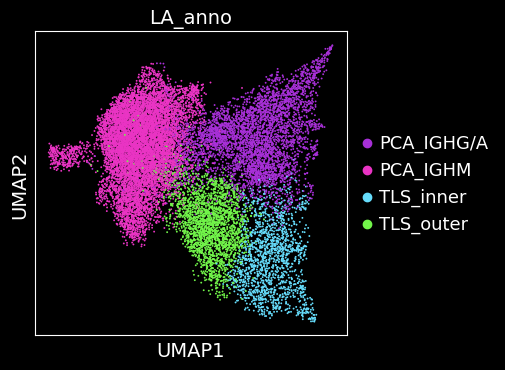

In [5]:
#plt.style.use('seaborn-v0_8-white')
plt.style.use('dark_background')
LA_bin50.obs['LA_anno']='PCA_IGHM'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['3','5','6']),'LA_anno']='PCA_IGHG/A'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['2']),'LA_anno']='TLS_outer'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['4']),'LA_anno']='TLS_inner'
sc.pl.umap(LA_bin50,color=['LA_anno'],palette=['#A830D8','#EA34C4','#66DDFC','#72F54A'])

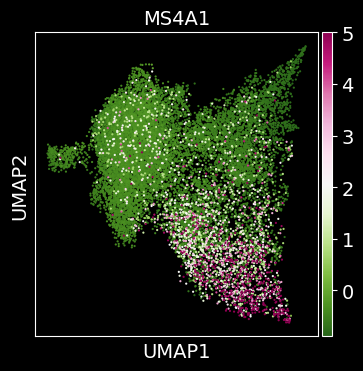

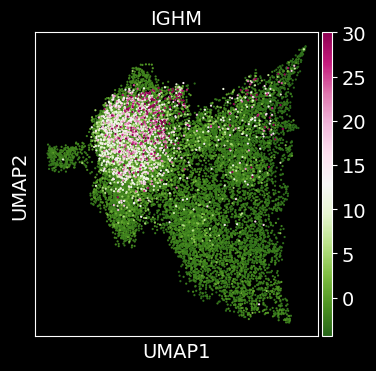

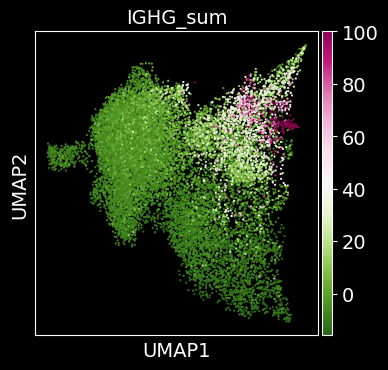

In [6]:
cmap='PiYG_r'
sc.pl.umap(LA_bin50,color=['MS4A1'],use_raw=False,cmap=cmap,vmax=5,s=10)
sc.pl.umap(LA_bin50,color=['IGHM'],use_raw=False,cmap=cmap,vmax=30,s=10)
LA_bin50.obs['IGHG_sum'] = np.sum([LA_bin50[:, gene].X for gene in ['IGHG1', 'IGHG2', 'IGHG3', 'IGHG4']], axis=0)
sc.pl.umap(LA_bin50, color='IGHG_sum', use_raw=False, cmap=cmap, vmax=100, s=10)

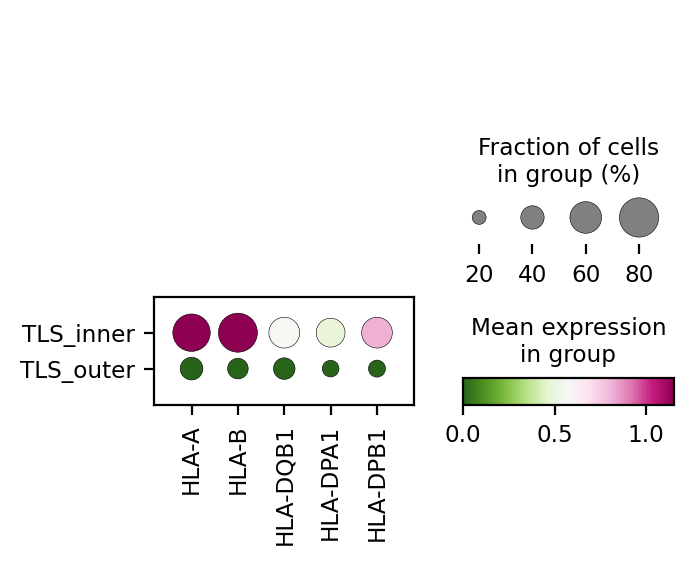

In [7]:
plt.rcParams.update(plt.rcParamsDefault)
sc.pl.dotplot(
    LA_bin50[LA_bin50.obs['LA_anno'].isin(['TLS_inner', 'TLS_outer'])],
    ['HLA-A', 'HLA-B', 'HLA-DQB1', 'HLA-DPA1', 'HLA-DPB1'],
    groupby='LA_anno',
    swap_axes=False,
    use_raw=False,
    vmax=1.15,
    vmin=0,
    cmap='PiYG_r',
    save='Sup8B.pdf'
)

# Sup8C

In [8]:
LA_cell = sc.read_h5ad('/data1/fengyu/methods/zy/script_for_github/Figure4-ok_7.23/test/新增分析8.1_PPT/LA_Cell_with_slingshot.h5ad')

In [15]:
LA_cell

AnnData object with n_obs × n_vars = 34835 × 3000
    obs: 'dnbCount', 'area', 'orig.ident', 'x', 'y', 'cellID', 'bin50_x', 'bin50_y', 'TRAcdr3aa', 'TRBcdr3aa', 'IGK/Lcdr3aa', 'IGKorIGL', 'bin50_location_id', 'anno', 'anno2', 'bin50 structural annotation', 'loc', 'PCAcluster', 'TLScluster', 'CSR', 'class', 'TRDcdr3aa', 'TRGcdr3aa', 'IGHcdr3aa', 'mutation_percent', 'clone_family_id', 'shm', 'depth', 'label', 'batch', 'LA_anno', 'umap_X', 'umap_Y', 'slingshot_pseudotime'
    var: 'real_gene_name-D06047A2', 'real_gene_name-D06047C3', 'real_gene_name-D06047D4', 'real_gene_name-D06047E1', 'real_gene_name-D06047E2', 'real_gene_name-D06047F6', 'real_gene_name-D06050A2', 'real_gene_name-D06050C2', 'real_gene_name-D06050D4', 'real_gene_name-D06050E4', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'LA_anno_colors', 'REFERENCE_MANU', 'hvg', 'pca', 'pearson_residuals_normalization', 'scaled|original|cum

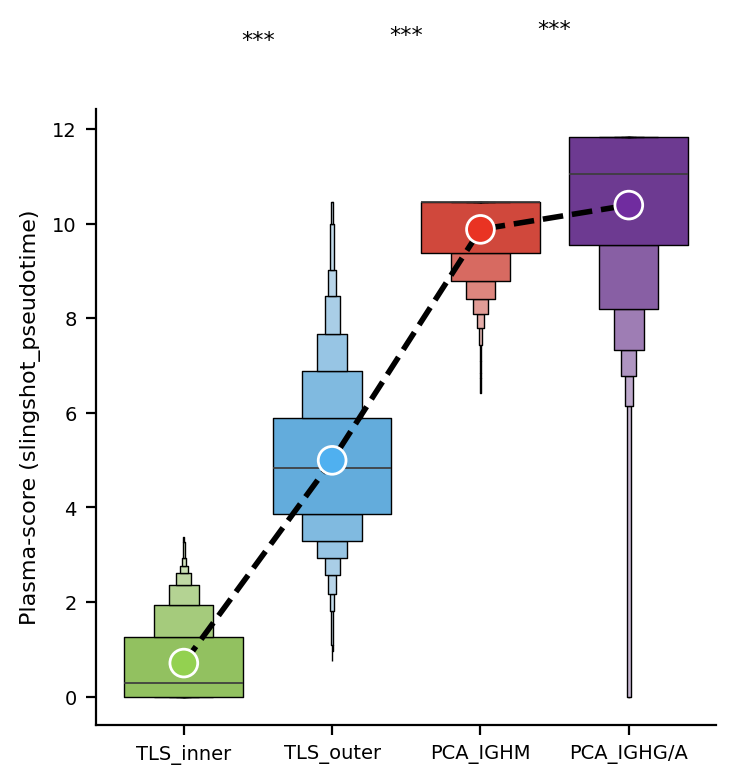

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
from scipy.stats import mannwhitneyu
plt.rcParams.update(plt.rcParamsDefault)
LA = df1.obs
order = ['TLS_inner', 'TLS_outer', 'PCA_IGHM', 'PCA_IGHG/A']
df = LA
plt.figure(figsize=(4, 4))
ax = sns.boxenplot(
    data=df,
    x='LA_anno',
    y='slingshot_pseudotime',
    hue='LA_anno',
    palette=['#702C9F', '#E93323', '#93D150', '#4FB0F0'],
    order=order,
    linewidth=0.5,
    alpha=1,
    showfliers=False,
    edgecolor='black'
)

from scipy.stats import ttest_ind  

pairs = [
    ('TLS_inner', 'TLS_outer'),
    ('TLS_outer', 'PCA_IGHM'),
    ('PCA_IGHM', 'PCA_IGHG/A')
]

height = df['slingshot_pseudotime'].max() * 1.15
y_increment = 0.04

for i, (g1, g2) in enumerate(pairs):
    d1 = df.loc[df['LA_anno'] == g1, 'slingshot_pseudotime'].values
    d2 = df.loc[df['LA_anno'] == g2, 'slingshot_pseudotime'].values
    
    
    _, p = ttest_ind(d1, d2, equal_var=False)  
    
   
    if p < 0.001:
        star = '***'
    elif p < 0.01:
        star = '**'
    elif p < 0.05:
        star = '*'
    else:
        star = 'ns'
    
    # 画水平线 + 星号
    x1, x2 = order.index(g1), order.index(g2)
    #ax.plot([x1, x2], [height, height], color='black', linewidth=1)
    ax.text((x1 + x2) * 0.5, height + y_increment, star,
            ha='center', va='bottom', color='black', fontsize=8)
    
    height += y_increment * 3

medians = df.groupby('LA_anno')['slingshot_pseudotime'].mean().reindex(order)
plt.scatter(
    x=medians.index, y=medians.values,
    color=['#93D150', '#4FB0F0', '#E93323','#702C9F'],
    s=100, zorder=5, edgecolor='white'
)
plt.plot(
    medians.index, medians.values,
    color='black', linestyle='--', linewidth=2, zorder=4
)

ax.set_xlabel('')
ax.set_ylabel('Plasma-score (slingshot_pseudotime)', fontsize=8)
ax.tick_params(axis='both', labelsize=7)
plt.legend([], [], frameon=False)   # 去掉重复 legend
plt.grid(False)
sns.despine()

# 保存
plt.savefig('Sup8C.pdf', dpi=600, bbox_inches='tight')
plt.show()

# Sup8D

In [16]:
import scanpy as sc
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2","D06047C3","D06047D4","D06047E1","D06047E2","D06047F6","D06050A2","D06050C2","D06050D4","D06050E4","D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

In [17]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

In [18]:
batch_order = [
    'D06053D2', 'D06047C3', 'D06047F6', 'D06047E1',
    'D06050A2', 'D06047A2', 'D06050C2', 'D06047D4',
    'D06047E2', 'D06050D4', 'D06050E4'
]

In [19]:
adata.obs_names = adata.obs_names.astype(str)
data = adata[adata.obs['batch'] == 'D06053D2']

In [20]:
for i in range(11):
    batch = batch_order[i]
    print(f'这里是P{i+1}的信息')
    data = adata[adata.obs['batch'] == batch]
    PCA_G = data.obs[data.obs['LA_anno'] == 'PCA_IGHG/A']
    PCA_M = data.obs[data.obs['LA_anno'] == 'PCA_IGHM']
    PCA_G_IGH_clone = PCA_G['IGHcdr3aa'].unique().tolist()
    #print(f'PCA_G中有{len(PCA_G_IGH_clone)}个克隆型')
    PCA_M_IGH_clone = PCA_M['IGHcdr3aa'].unique().tolist()
    #print(f'PCA_M中有{len(PCA_M_IGH_clone)}个克隆型')
    intersection_count = len(set(PCA_G_IGH_clone) & set(PCA_M_IGH_clone))
    print(f'PCA_M中的数字是{len(PCA_M_IGH_clone) - intersection_count}')
    print(f'二者交集是{intersection_count}')
    print(f'PCA_G中的数字是{len(PCA_G_IGH_clone) - intersection_count}')


这里是P1的信息
PCA_M中的数字是0
二者交集是10
PCA_G中的数字是971
这里是P2的信息
PCA_M中的数字是188
二者交集是15
PCA_G中的数字是5
这里是P3的信息
PCA_M中的数字是123
二者交集是5
PCA_G中的数字是3
这里是P4的信息
PCA_M中的数字是70
二者交集是17
PCA_G中的数字是12
这里是P5的信息
PCA_M中的数字是80
二者交集是3
PCA_G中的数字是0
这里是P6的信息
PCA_M中的数字是52
二者交集是112
PCA_G中的数字是733
这里是P7的信息
PCA_M中的数字是126
二者交集是24
PCA_G中的数字是13
这里是P8的信息
PCA_M中的数字是1395
二者交集是120
PCA_G中的数字是31
这里是P9的信息
PCA_M中的数字是918
二者交集是79
PCA_G中的数字是25
这里是P10的信息
PCA_M中的数字是1267
二者交集是89
PCA_G中的数字是39
这里是P11的信息
PCA_M中的数字是29
二者交集是27
PCA_G中的数字是68


# Sup8E

In [4]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [1]:
# 读取数据
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

# 确保观测名是字符串类型
adata.obs_names = adata.obs_names.astype(str)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/ann

In [5]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [7]:
adata.obs_names = adata.obs_names.astype(str)
LA=adata[adata.obs['LA_anno'].notna()]

In [8]:
data = adata[adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer','PCA_IGHM','PCA_IGHG/A'])]

In [9]:
data = data[data.obs['anno'].isin(['plasma_cell','b_cell'])]

In [10]:
order = ['TLS_inner','TLS_outer','PCA_IGHM','PCA_IGHG/A']

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


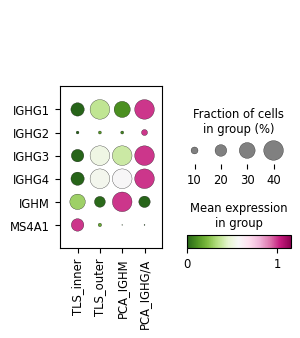

In [11]:
sc.pl.dotplot(
    data,
    ['IGHG1','IGHG2','IGHG3','IGHG4','IGHM','MS4A1'],
    groupby='LA_anno',
    cmap='PiYG_r',
    standard_scale='var',
    vmax=1.15,swap_axes=True,dot_max= 0.4,
    categories_order=['TLS_inner','TLS_outer','PCA_IGHM','PCA_IGHG/A'],
    save='Sup8E_PiYG_r.pdf'
)

# Sup8F

In [21]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')

In [12]:
LA_cell = sc.read_h5ad('/data1/fengyu/methods/zy/script_for_github/Figure4-ok_7.23/test/新增分析8.1_PPT/LA_Cell_with_slingshot.h5ad')

In [20]:
LA_cell.obs[LA_cell.obs['IGHcdr3aa'].notna() | LA_cell.obs['IGK/Lcdr3aa'].notna()]

,dnbCount,area,orig.ident,x,y,cellID,bin50_x,bin50_y,TRAcdr3aa,TRBcdr3aa,...,mutation_percent,clone_family_id,shm,depth,label,batch,LA_anno,umap_X,umap_Y,slingshot_pseudotime
0,399,691,sample,13822,4599,40,13800,4550,CAYRNRGGSNYKLTF,CASRYRDREFYEKLFF,...,0.053846,691.0,no,NaN,NaN,D06047A2,PCA_IGHG/A,5.508854,7.994329,8.726845
1,399,661,sample,13816,4553,42,13800,4550,NaN,NaN,...,NaN,NaN,no,NaN,NaN,D06047A2,PCA_IGHG/A,5.508854,7.994329,8.726845
2,223,374,sample,13808,4583,43,13800,4550,CAVSLDRGSTLGRLYF,CASSIPGAAANGYTF,...,0.023077,3098.0,yes,1.0,2|A,D06047A2,PCA_IGHG/A,5.508854,7.994329,8.726845
3,109,201,sample,13803,4563,45,13800,4550,NaN,NaN,...,0.053846,1333.0,no,NaN,NaN,D06047A2,PCA_IGHG/A,5.508854,7.994329,8.726845
4,178,327,sample,13791,4596,48,13750,4550,CAVSLDRGSTLGRLYF,CASSLQGGDQPQHF,...,0.007692,2028.0,no,NaN,NaN,D06047A2,PCA_IGHG/A,7.153413,9.423100,10.075242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34830,124,239,sample,8710,15936,182618,8700,15900,NaN,NaN,...,NaN,NaN,no,NaN,NaN,D06053D2,PCA_IGHG/A,6.494495,5.435025,8.802203
34831,393,775,sample,8704,16072,182619,8700,16050,NaN,NaN,...,0.069231,1352.0,no,NaN,NaN,D06053D2,PCA_IGHG/A,5.876225,6.113938,8.321411
34832,61,116,sample,11601,16071,183137,11600,16050,NaN,NaN,...,NaN,NaN,no,NaN,NaN,D06053D2,TLS_outer,5.485711,4.661251,4.330092
34833,96,192,sample,11566,16101,183157,11550,16100,NaN,NaN,...,NaN,NaN,no,NaN,NaN,D06053D2,TLS_outer,5.185900,3.772957,4.040190


In [13]:
LA = LA_cell.copy()

In [14]:
LA.obsm['X_umap']=LA.obsm['spatial']

In [32]:
df1=LA[(LA.obs['batch']=='D06047A2')&(LA.obs['bin50 structural annotation']=='LA-TLS')].obs
tissue_outline=pd.DataFrame(adata1.uns['tissue_outline'],columns=['x','y'])
df1 = df1.reset_index()

In [33]:
array_2d = adata1.obsm['cell_border'].reshape(-1, adata1.obsm['cell_border'].shape[-1])

# 创建 DataFrame
df = pd.DataFrame(array_2d)
df['cellID'] = df.index // 32
df['cellID']=df['cellID'].astype(str)
df.rename(columns={0:'x',1:'y'}, inplace=True)
df_filtered = df[(df['x'] != 32767) & (df['y'] != 32767)]
adata1.obs['cellID'] = adata1.obs['cellID'].astype(str)
df_filtered = pd.merge(df_filtered, adata1.obs[['x','y','cellID']], on='cellID', how='left')
df_filtered['x']=df_filtered['x_x']+df_filtered['x_y']
df_filtered['y']=df_filtered['y_x']+df_filtered['y_y']
df_cellborder=df_filtered[['cellID','x','y']]

In [34]:
data_GA=df1.copy()

In [35]:
cell_list1 = data_GA['cellID'].tolist()
df_cellborder['cellID'] = df_cellborder['cellID'].astype(str)
cell_border1 = df_cellborder[df_cellborder['cellID'].isin(cell_list1)]
cell_border1

/tmp/ipykernel_2927115/686771752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cellborder['cellID'] = df_cellborder['cellID'].astype(str)


,cellID,x,y
24481,2269,14014,5269
24482,2269,14006,5276
24483,2269,14003,5282
24484,2269,14003,5293
24485,2269,14009,5300
...,...,...,...
1363514,128523,14161,14354
1363515,128523,14162,14353
1363516,128523,14167,14352
1363517,128523,14169,14350


In [36]:
cell_border_list1 = cell_border1.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list1 = cell_border_list1
# 将每个细胞的坐标转换为 NumPy 数组
filtered_cell_borders_list1 = [np.array(cell) for cell in filtered_cell_borders_list1]
filtered_cell_borders_list1[0]

array([[ 8848, 12574],
       [ 8853, 12579],
       [ 8853, 12585],
       [ 8856, 12590],
       [ 8856, 12593],
       [ 8862, 12599],
       [ 8864, 12598],
       [ 8872, 12589],
       [ 8871, 12577],
       [ 8864, 12571],
       [ 8856, 12574]])

In [37]:
data_GA = data_GA.reset_index()

In [38]:
time_list = data_GA['slingshot_pseudotime'].tolist()

In [39]:
data_GA['slingsdhot_pseudotime'].max()

11.840807612638862

/tmp/ipykernel_2927115/206074691.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('PiYG_r')      # 可换成 'plasma', 'Spectral', ...


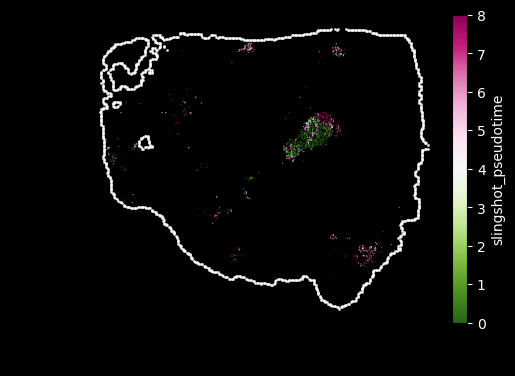

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from scipy.interpolate import splprep, splev
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize

GM_COLOR = '#E64B35'   # 亮红
GA_COLOR = '#204B5A'   # 深蓝
BG_COLOR =   'black'    # 画布底色
TXT_COLOR =  'white'  # 文字颜色（与背景反色）

fig, ax = plt.subplots(figsize=(5, 4))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)

# -------------------------------------------------
# 4. 平滑边界并生成 Path 补丁
# -------------------------------------------------
def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))

# 1. 选 colormap 和归一化范围
cmap = cm.get_cmap('PiYG_r')      # 可换成 'plasma', 'Spectral', ...
norm = Normalize(vmin=0,
                 vmax=8)

# 2. 生成 patches
patches = []
colors  = []                       # 用于 PatchCollection 的 facecolor 列表
for i, cell_boundary in enumerate(filtered_cell_borders_list1):
    if len(cell_boundary) < 3:
        continue
    smooth = smooth_boundary(cell_boundary, 0.8)
    codes  = [Path.LINETO] * len(smooth)
    codes[0]  = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY

    # 根据 time 映射颜色
    color_rgba = cmap(norm(time_list[i]))
    colors.append(color_rgba)

    patches.append(PathPatch(Path(smooth, codes),
                             edgecolor = None,
                             facecolor=color_rgba,
                             lw = 0.01,
                             antialiased=True))

# 3. 一次性添加到坐标轴
ax.add_collection(PatchCollection(patches, match_original=True))
# 3. 一次性添加到坐标轴
collection = PatchCollection(patches, match_original=True)
ax.add_collection(collection)

# ✅ 添加 colorbar
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # 仅用于映射，不依赖实际数据

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.02)
cbar.set_label('slingshot_pseudotime', color=TXT_COLOR, fontsize=10)
cbar.ax.yaxis.set_tick_params(color=TXT_COLOR, labelcolor=TXT_COLOR)
# -------------------------------------------------
# 5. 绘制组织轮廓（可选）
# -------------------------------------------------
sns.scatterplot(data=tissue_outline, x='x', y='y',
                color='white', s=3, edgecolor=None, ax=ax)

# -------------------------------------------------
# 6. 图例、坐标轴、保存
# -------------------------------------------------
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='GM',
           markerfacecolor=GM_COLOR, markersize=8, lw=0),
    Line2D([0], [0], marker='s', color='w', label='GA',
           markerfacecolor=GA_COLOR, markersize=8, lw=0)
]

plt.grid(False)
plt.savefig('Sup8F2.pdf',
            dpi=2500,               # 2500 太大，600 已足够
            bbox_inches='tight',
            facecolor=BG_COLOR,
            edgecolor='none')
plt.show()